---**Hello everyone!**---

Today I am going to build my first machine learning alogrithm which a simple linear regression model.....


---**So what is linear regression?**---


--Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. 


--It is the easiest alogrithm among all machine learning agorithm.


--Its quite simple to implement.


----**About Dataset**----

Here I am using a simple dataset from kaggle which is Weights and Heights dataset tried to apply linear regression algorithm.

The data contains the variables

**---Gender**

**---Height (m) **

**---Weight (kg)**



---**Goal**---

- Predict the height or weight of a person.


**Step 1--Data Preprocessing**

In [32]:

#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [33]:
#Read the datasets
dataset=pd.read_csv("../input/weight-height.csv")


In [34]:
#Check the dataset
dataset.head()



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [35]:

#check if null values is present in dataset or not.....
dataset.isnull().sum()


Gender    0
Height    0
Weight    0
dtype: int64

In [36]:
#Checking the dimensions of the dataset
dataset.shape

(10000, 3)

**Lets check the correlation between each variables**

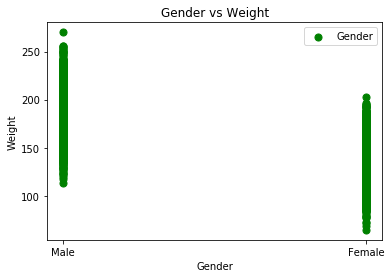

In [37]:

#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()


Here in the above plot, we can see **weight is not atall dependent on Gender**.
So,Gender variable **is not useful** for our prediction.

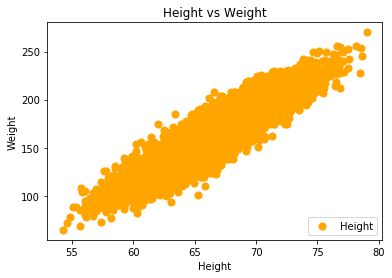

In [38]:

#Plot Height vs Weight............
x2 = dataset.iloc[:, 1].values
y2 = dataset.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()


From the above plot can have idea that **weight and height are highly dependent** on each other.In other words,we can say that as **height increases ,weight also increases**.


In [39]:
#separating the dependent and independent values....
#X-Independent variable
X = dataset.iloc[:, 1:2].values
print(X)


array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [50]:
#y-dependent or target variable
y = dataset.iloc[:, 2].values
print(y)



[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


**Step 2-Splitting the dataset into training and testing set**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


**Step 3-Build a linear model**

In [42]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)



**Step 4-Now fun part**

---Visualize the result.

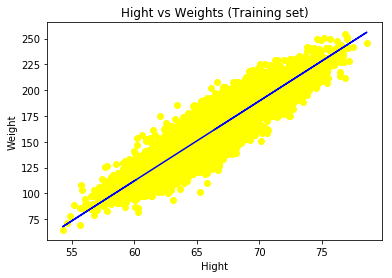

In [49]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()


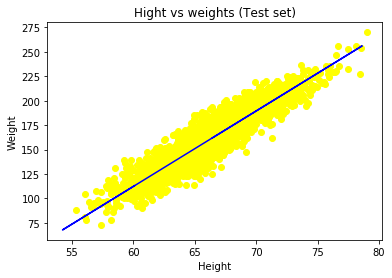

In [47]:

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

**Step 5-Checking the accuracy**


In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))





Coefficients:  [7.72896259]
Mean squared error: 143.23
Variance score: 0.86
